In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.cluster import KMeans
from sklearn import cross_validation
from sklearn import metrics 
from sklearn import datasets

/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [29]:
iris = pd.read_csv("iris.csv")

In [30]:
species = iris['Species'].unique()

In [31]:
features  = iris.columns.values.tolist()
features.pop(0)
features.pop(-1)
features

['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']

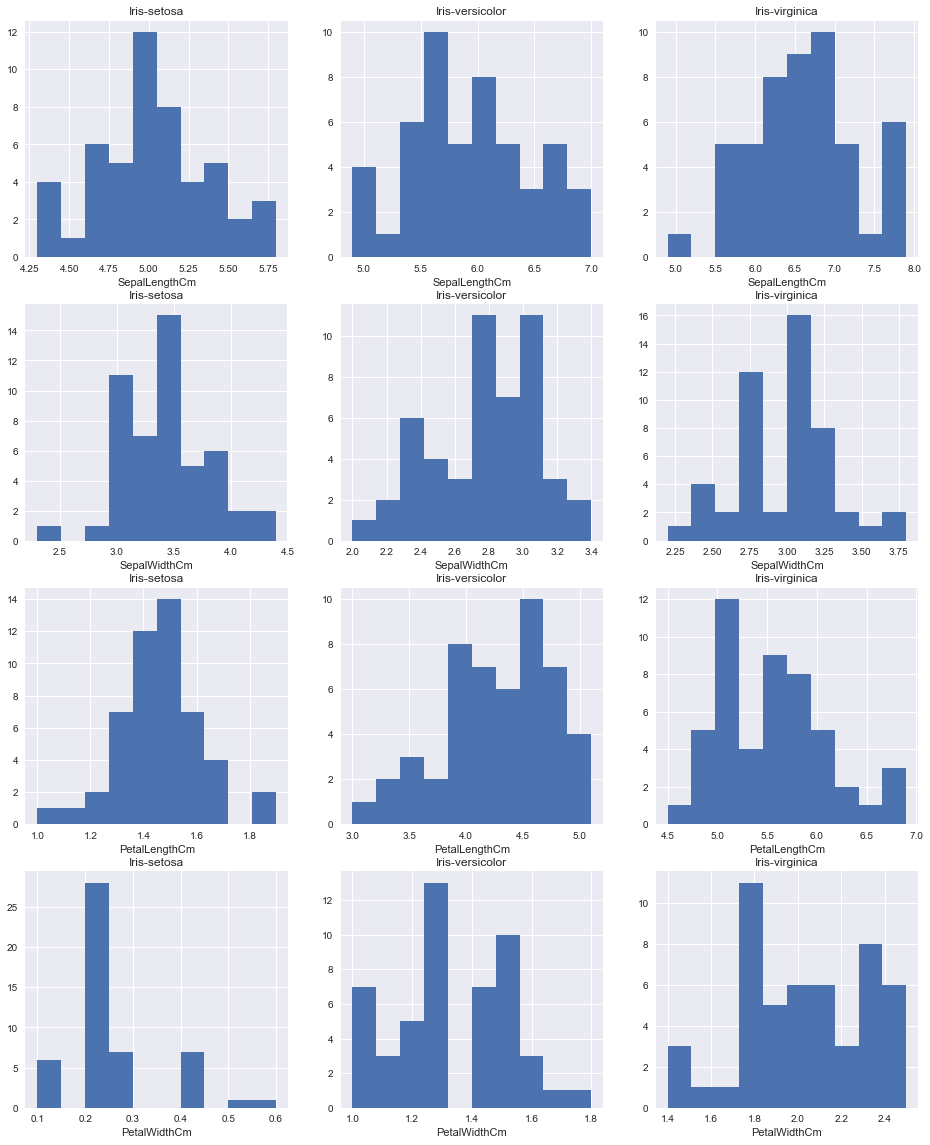

In [35]:
plt.figure(figsize = (16, 20))
plot_number = 0
for feature in features:
    for sp in species:
        plot_number += 1
        plt.subplot(4, 3, plot_number)
        plt.hist(iris[iris.Species == sp][feature])
        plt.title(sp)
        plt.xlabel(feature)
plt.show()

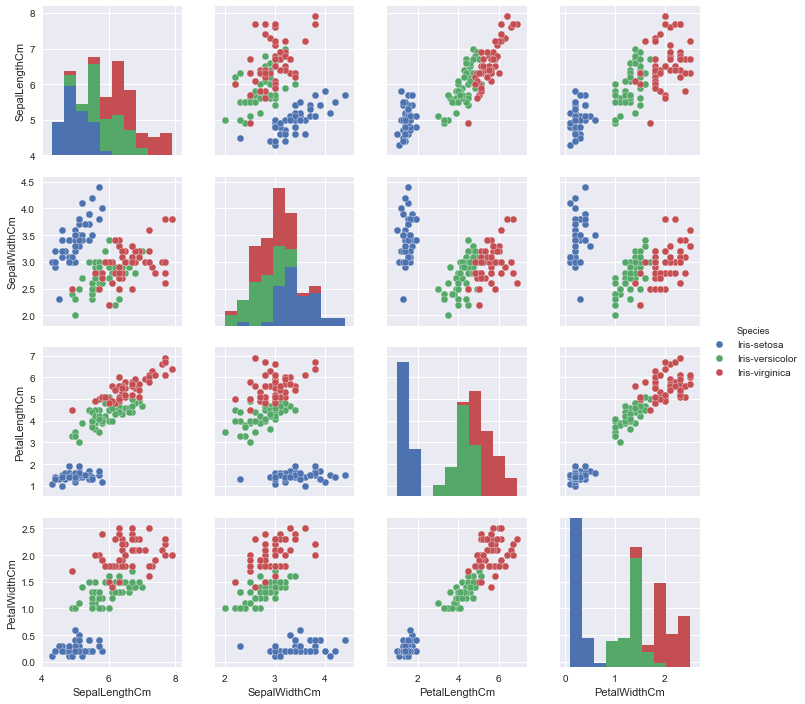

In [36]:
sb.pairplot(iris[[features[0], features[1], features[2], features[3], 'Species']], hue = 'Species')
plt.show()

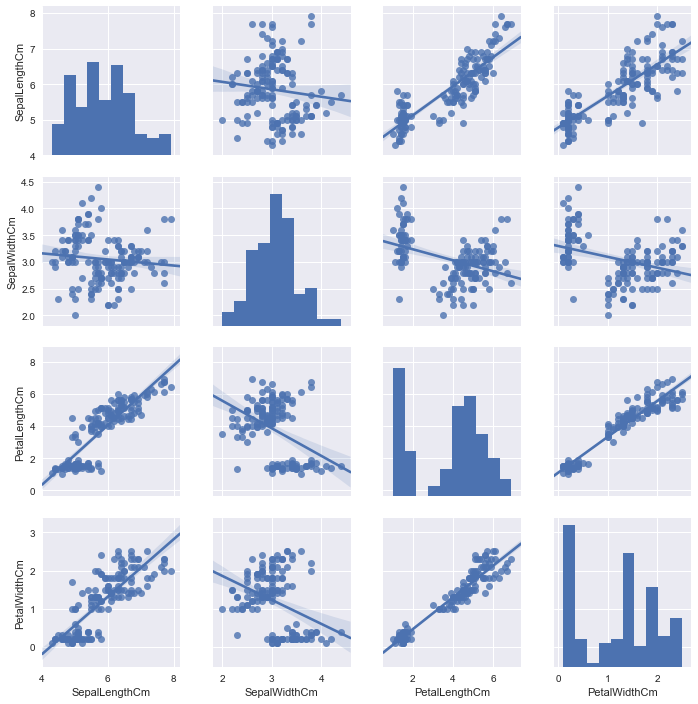

In [37]:
sb.pairplot(iris[[features[0], features[1], features[2], features[3], 'Species']], kind = 'reg')
plt.show()

In [38]:
corr = iris[[features[0], features[1], features[2], features[3]]].corr()
corr

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


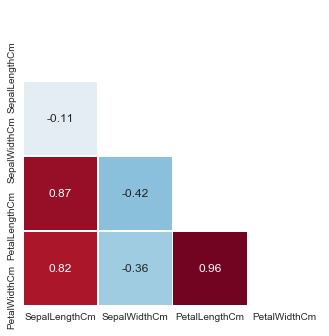

In [39]:
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sb.axes_style('white'):
    ax = sb.heatmap(corr, mask=mask, square=True, cbar=False, annot=True, linewidths=.5)
plt.show()

In [40]:
target = []
for i in iris.Species:
    if i=='Iris-setosa':
        target.append(0)
    elif i=='Iris-versicolor':
        target.append(1)
    elif i=='Iris-virginica':
        target.append(2)
iris['target'] = target

In [63]:
train_data, test_data, train_labels, test_labels = cross_validation.train_test_split(iris[[features[0],
                                                                                                 features[1],
                                                                                                 features[2],
                                                                                                 features[3]]],
                                                                                     iris['target'],
                                                                                     test_size = 0.3)

model = KMeans(n_clusters=3, random_state = 0)
model.fit(train_data)
model_predictions = model.predict(test_data)

print(metrics.accuracy_score(test_labels, model_predictions))
print(metrics.classification_report(test_labels, model_predictions))

0.911111111111
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        12
          1       0.84      0.94      0.89        17
          2       0.93      0.81      0.87        16

avg / total       0.91      0.91      0.91        45



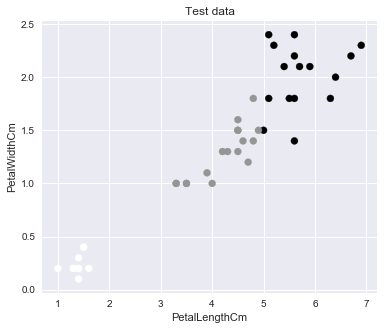

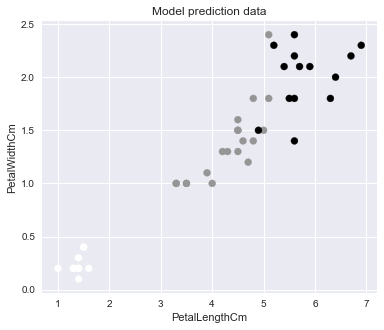

In [64]:
fig = plt.figure(1, figsize=(6, 5))
plt.scatter(test_data[features[2]], test_data[features[3]], c=test_labels.astype(np.float))

plt.ylabel('PetalWidthCm')
plt.xlabel('PetalLengthCm')
plt.title('Test data')
plt.show()

fig = plt.figure(1, figsize=(6, 5))
plt.ylabel('PetalWidthCm')
plt.xlabel('PetalLengthCm')
plt.title('Model prediction data')
plt.scatter(test_data[features[2]], test_data[features[3]], c=model_predictions.astype(np.float))

plt.show()